In [1]:
import pandas as pd
import requests
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

In [2]:
def fetch_hourly_data(symbol, start_date, end_date, api_key):
    url = f"https://api.polygon.io/v2/aggs/ticker/{symbol}/range/1/hour/{start_date}/{end_date}?apiKey={api_key}"
    response = requests.get(url)
    hourly_data = pd.DataFrame(response.json()['results'])
    hourly_data['date'] = pd.to_datetime(hourly_data['t'], unit='ms')
    hourly_data.drop(columns=['t'], inplace=True)   
     
    return hourly_data

Epoch 1/150


/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_53614/3119315331.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1.0422  
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.0491 
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.0184 
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9831 
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8776 
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9221 
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8911 
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8278 
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7563 
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7172 
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7422 
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6658 
Epoch 13/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6219 
Epoch 14/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5843 
Epoch 15/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5929 
Epoch 16/150
3/3 ━━━━━━━━━━━━━

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_53614/3119315331.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9473  
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9223 
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8212 
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8000 
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7625 
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7912 
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7704 
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7494 
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6569 
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6439 
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6595 
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6319 
Epoch 13/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6087 
Epoch 14/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5403 
Epoch 15/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5071 
Epoch 16/150
3/3 ━━━━━━━━━━━━━

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_53614/3119315331.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9709  
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9409 
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9555 
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9451 
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9220 
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8634 
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8746 
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7953 
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8534 
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7929 
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7445 
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7502 
Epoch 13/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6466 
Epoch 14/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6958 
Epoch 15/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6744 
Epoch 16/150
3/3 ━━━━━━━━━━━━━

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_53614/3119315331.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0556  
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0322 
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9769 
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9406 
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9120 
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8843 
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9023 
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8132 
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7991 
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7718 
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6609 
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6517 
Epoch 13/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5776 
Epoch 14/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5762 
Epoch 15/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5308 
Epoch 16/150
3/3 ━━━━━━━━━━━━━

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_53614/3119315331.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0963  
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.1074 
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9657 
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9274 
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9586 
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9360 
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8509 
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8557 
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7928 
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7148 
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7421 
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6515 
Epoch 13/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6086 
Epoch 14/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5970 
Epoch 15/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5889 
Epoch 16/150
3/3 ━━━━━━━━━━━━━

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_53614/3119315331.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9746  
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9095 
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8997 
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8567 
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7990 
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7558 
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7258 
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6991 
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6433 
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6140 
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5843 
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5312 
Epoch 13/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5232 
Epoch 14/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4640 
Epoch 15/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4176 
Epoch 16/150
3/3 ━━━━━━━━━━━━━

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_53614/3119315331.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9587  
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8700 
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7913 
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7511 
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8070 
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6592 
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6503 
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7001 
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5721 
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5689 
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4945 
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4640 
Epoch 13/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4350 
Epoch 14/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3915 
Epoch 15/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3367 
Epoch 16/150
3/3 ━━━━━━━━━━━━━

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_53614/3119315331.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8683  
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8269 
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8113 
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8404 
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7279 
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7091 
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6554 
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6608 
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6566 
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6022 
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5496 
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4857 
Epoch 13/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4159 
Epoch 14/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4188 
Epoch 15/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4345 
Epoch 16/150
3/3 ━━━━━━━━━━━━━

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_53614/3119315331.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9430  
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9932 
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8735 
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9021 
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7995 
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8096 
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7961 
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6621 
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6760 
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6175 
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6229 
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5816 
Epoch 13/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5662 
Epoch 14/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4969 
Epoch 15/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4910 
Epoch 16/150
3/3 ━━━━━━━━━━━━━

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_53614/3119315331.py:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8457  
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8461 
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7638 
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7447 
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7217 
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7471 
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6713 
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7001 
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6697 
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6131 
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6130 
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5991 
Epoch 13/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5454 
Epoch 14/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5860 
Epoch 15/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5230 
Epoch 16/150
3/3 ━━━━━━━━━━━━━

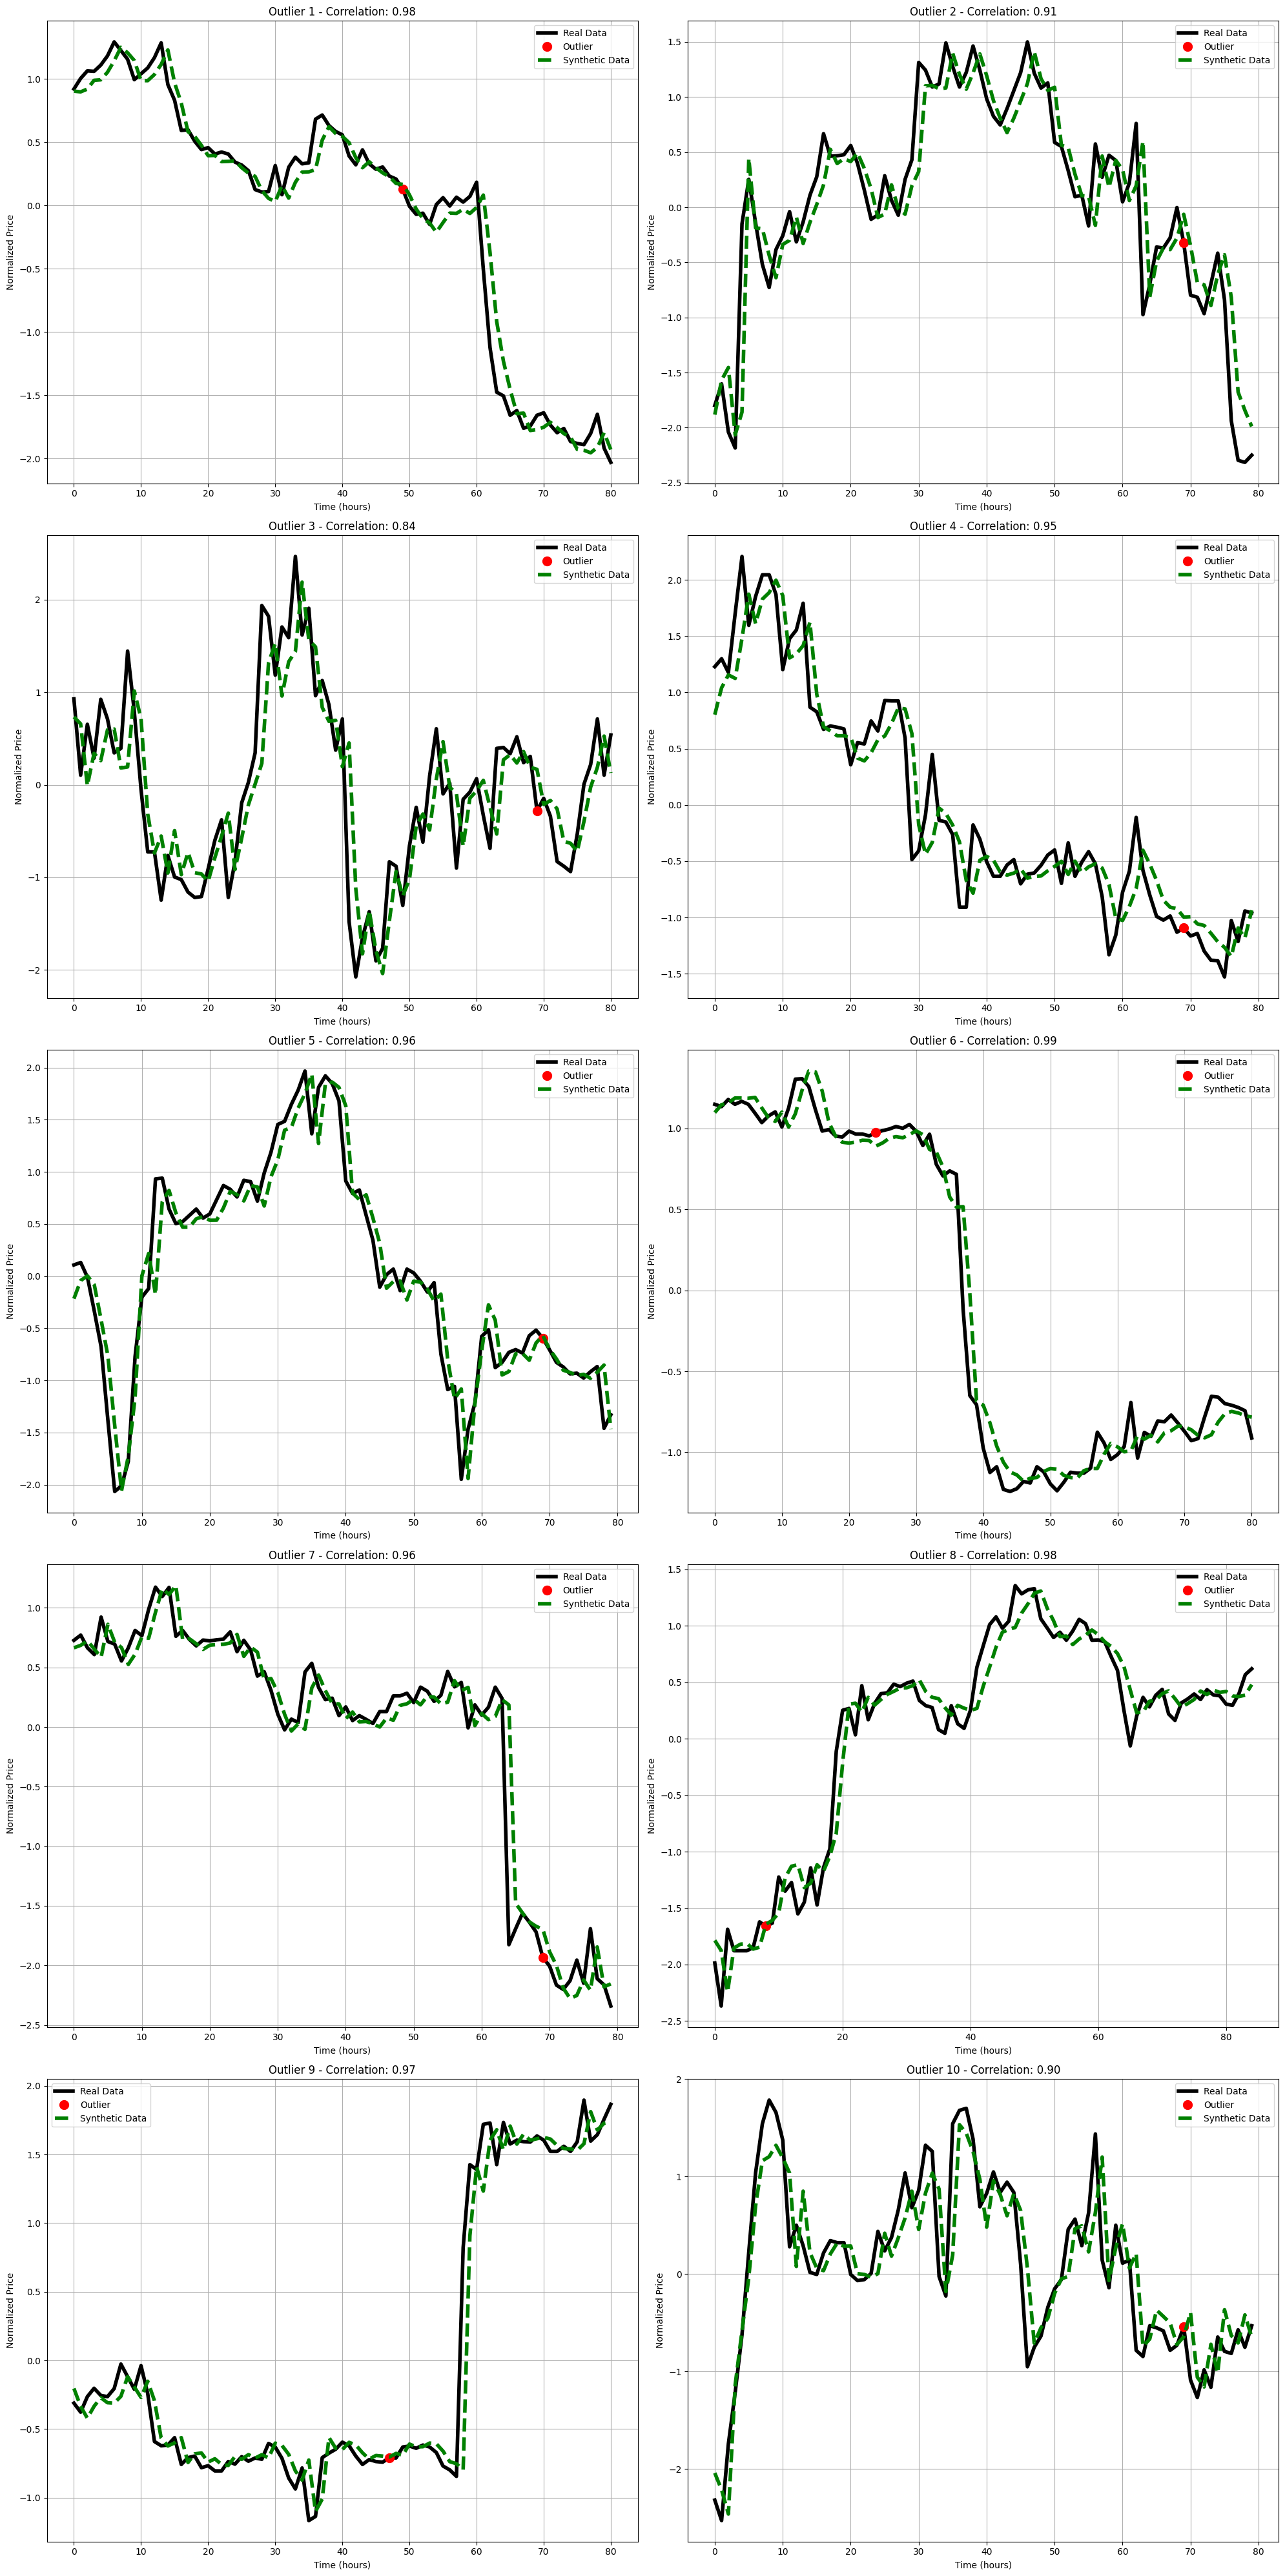

In [3]:
# Load the dataset
data = pd.read_csv('Outlier Dataset.csv')
data['date'] = pd.to_datetime(data['date'])

# Filter rows where 'outlier' is 1
outliers = data[data['outlier'] == 1]

# Generate date ranges for each outlier
date_ranges = pd.DataFrame({
    "start_date": outliers['date'] - timedelta(days=3),
    "end_date": outliers['date'] + timedelta(days=3),
    "outlier_date": outliers['date']
})

api_key = 'beBybSi8daPgsTp5yx5cHtHpYcrjp5Jq'
symbol = 'C:USDEUR'

# Plotting setup
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 40))
axs = axs.flatten()

# Process each date range
for idx, (ax, (_, row)) in enumerate(zip(axs, date_ranges.iterrows())):
    hourly_data = fetch_hourly_data(symbol, row['start_date'].date(), row['end_date'].date(), api_key)
    
    # Fill missing values
    hourly_data.fillna(method='ffill', inplace=True)  # forward fill

    # Normalize data
    scaler = StandardScaler()
    hourly_data[['v', 'vw', 'o', 'c', 'h', 'l']] = scaler.fit_transform(hourly_data[['v', 'vw', 'o', 'c', 'h', 'l']])

    # Prepare data for LSTM
    n_features = 1
    n_timesteps = 3  # Number of timesteps per sequence
    X = []
    y = []

    for i in range(n_timesteps, len(hourly_data)):
        X.append(hourly_data[['c']].iloc[i-n_timesteps:i].values)
        y.append(hourly_data['c'].iloc[i])

    X = np.array(X)
    y = np.array(y)

    # Build and fit LSTM model
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(n_timesteps, n_features)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, y, epochs=150, verbose=1)

    # Predict and generate synthetic data
    predicted = model.predict(X)
    noise = np.random.normal(0, 0.01, predicted.shape)
    synthetic_data = predicted + noise

    # Correlation calculation
    real_data = hourly_data['c'].iloc[n_timesteps:].values
    correlation, _ = pearsonr(real_data, synthetic_data.flatten())
    print(f'Packet {idx+1} - Correlation: {correlation}')

    # Find index of the outlier in the normalized data
    outlier_index = hourly_data.index[hourly_data['date'] == row['outlier_date']]
    
    # Plotting real vs synthetic data
    ax.plot(real_data, label='Real Data', color='black', linewidth=4)
    if not outlier_index.empty:
        ax.plot(outlier_index[0] - n_timesteps, real_data[outlier_index[0] - n_timesteps], 'ro', markersize=10, label='Outlier')  # Mark the outlier with a larger red dot
    ax.plot(synthetic_data.flatten(), label='Synthetic Data', color='green', linestyle='--', linewidth=4)
    ax.set_title(f'Outlier {idx + 1} - Correlation: {correlation:.2f}')
    ax.set_xlabel('Time (hours)')
    ax.set_ylabel('Normalized Price')
    ax.legend()
    ax.grid(True)

# Display all the plots
plt.tight_layout()
plt.show()

In [4]:
outliers

,Unnamed: 0,v,vw,o,c,h,l,n,date,prev_close,daily_return,abs_daily_return,source,outlier
14,15,82724,0.9033,0.90794,0.89759,0.90807,0.897300,82724,2023-07-12,0.90793,-0.011389,0.011389,historical,1
27,28,156010,0.9048,0.90266,0.91087,0.91190,0.896620,156010,2023-07-27,0.90267,0.009084,0.009084,historical,1
70,71,122190,0.9351,0.93168,0.94025,0.94056,0.929627,122190,2023-09-14,0.93167,0.009209,0.009209,historical,1
94,95,128469,0.9448,0.94127,0.94914,0.95001,0.939673,128469,2023-10-12,0.94126,0.008372,0.008372,historical,1
113,114,87882,0.9359,0.94197,0.93120,0.94204,0.930300,87882,2023-11-03,0.94196,-0.011423,0.011423,historical,1
122,123,90791,0.9272,0.93437,0.91925,0.93517,0.918274,90791,2023-11-14,0.93442,-0.016235,0.016235,historical,1
149,150,123989,0.9140,0.91884,0.90960,0.91917,0.908100,123989,2023-12-14,0.91886,-0.010078,0.010078,historical,1
165,166,88179,0.9105,0.90604,0.91388,0.91419,0.905300,88179,2024-01-02,0.90604,0.008653,0.008653,historical,1
250,251,71362,0.9271,0.92060,0.93098,0.93204,0.920000,71362,2024-04-10,0.92087,0.010979,0.010979,historical,1
300,301,68754,0.9214,0.91812,0.92580,0.92593,0.917000,68754,2024-06-07,0.91811,0.008376,0.008376,historical,1


Epoch 1/150


/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_54072/19241809.py:51: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0132  
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8761 
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8891 
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8335 
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8040 
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7484 
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7511 
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6887 
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6638 
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6784 
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6080 
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5603 
Epoch 13/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5441 
Epoch 14/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4943 
Epoch 15/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4329 
Epoch 16/150
3/3 ━━━━━━━━━━━━━

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_54072/19241809.py:51: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8217  
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8438 
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7497 
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6897 
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7011 
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6402 
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6185 
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6586 
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6248 
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5850 
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6352 
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5466 
Epoch 13/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4913 
Epoch 14/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4673 
Epoch 15/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5090 
Epoch 16/150
3/3 ━━━━━━━━━━━━━

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_54072/19241809.py:51: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9290  
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8528 
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8940 
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7956 
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8032 
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7785 
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7806 
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7670 
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6831 
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6350 
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6171 
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6305 
Epoch 13/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5490 
Epoch 14/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5363 
Epoch 15/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5434 
Epoch 16/150
3/3 ━━━━━━━━━━━━━

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_54072/19241809.py:51: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.9174  
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8459 
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8197 
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7933 
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7429 
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7185 
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6330 
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6326 
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5976 
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5245 
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4698 
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4400 
Epoch 13/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3799 
Epoch 14/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3414 
Epoch 15/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2887 
Epoch 16/150
3/3 ━━━━━━━━━━━━━

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_54072/19241809.py:51: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0523  
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0621 
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0326 
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9912 
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9020 
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8758 
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7984 
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8403 
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7826 
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7551 
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7130 
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6845 
Epoch 13/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6302 
Epoch 14/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6220 
Epoch 15/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5650 
Epoch 16/150
3/3 ━━━━━━━━━━━━━

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_54072/19241809.py:51: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0478  
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0067 
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9516 
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9149 
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8715 
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8273 
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7715 
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7202 
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7165 
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6848 
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6089 
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5739 
Epoch 13/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5394 
Epoch 14/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5031 
Epoch 15/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4843 
Epoch 16/150
3/3 ━━━━━━━━━━━━━

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_54072/19241809.py:51: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.1041  
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9704 
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9138 
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9108 
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8782 
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8133 
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7940 
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7548 
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6869 
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7018 
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6823 
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5800 
Epoch 13/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5582 
Epoch 14/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5106 
Epoch 15/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4666 
Epoch 16/150
3/3 ━━━━━━━━━━━━━

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_54072/19241809.py:51: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.7937  
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7812 
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6305 
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6767 
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6300 
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6092 
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5122 
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.5295 
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4758 
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4564 
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3742 
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3533 
Epoch 13/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3279 
Epoch 14/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2820 
Epoch 15/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.2251 
Epoch 16/150
3/3 ━━━━━━━━━━━━━

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_54072/19241809.py:51: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.0183  
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9500 
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9772 
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9095 
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8800 
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7949 
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7928 
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7934 
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.7102 
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6243 
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5982 
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6052 
Epoch 13/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5809 
Epoch 14/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4995 
Epoch 15/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4325 
Epoch 16/150
3/3 ━━━━━━━━━━━━━

/var/folders/9n/nyfs9h7n2lsfs0vd2lq0589h0000gn/T/ipykernel_54072/19241809.py:51: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  hourly_data.fillna(method='ffill', inplace=True)  # forward fill
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8156  
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.7544 
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6965 
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6434 
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6906 
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6970 
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.6573 
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6552 
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.6545 
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5951 
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5459 
Epoch 12/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5250 
Epoch 13/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5178 
Epoch 14/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4540 
Epoch 15/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4691 
Epoch 16/150
3/3 ━━━━━━━━━━━━━

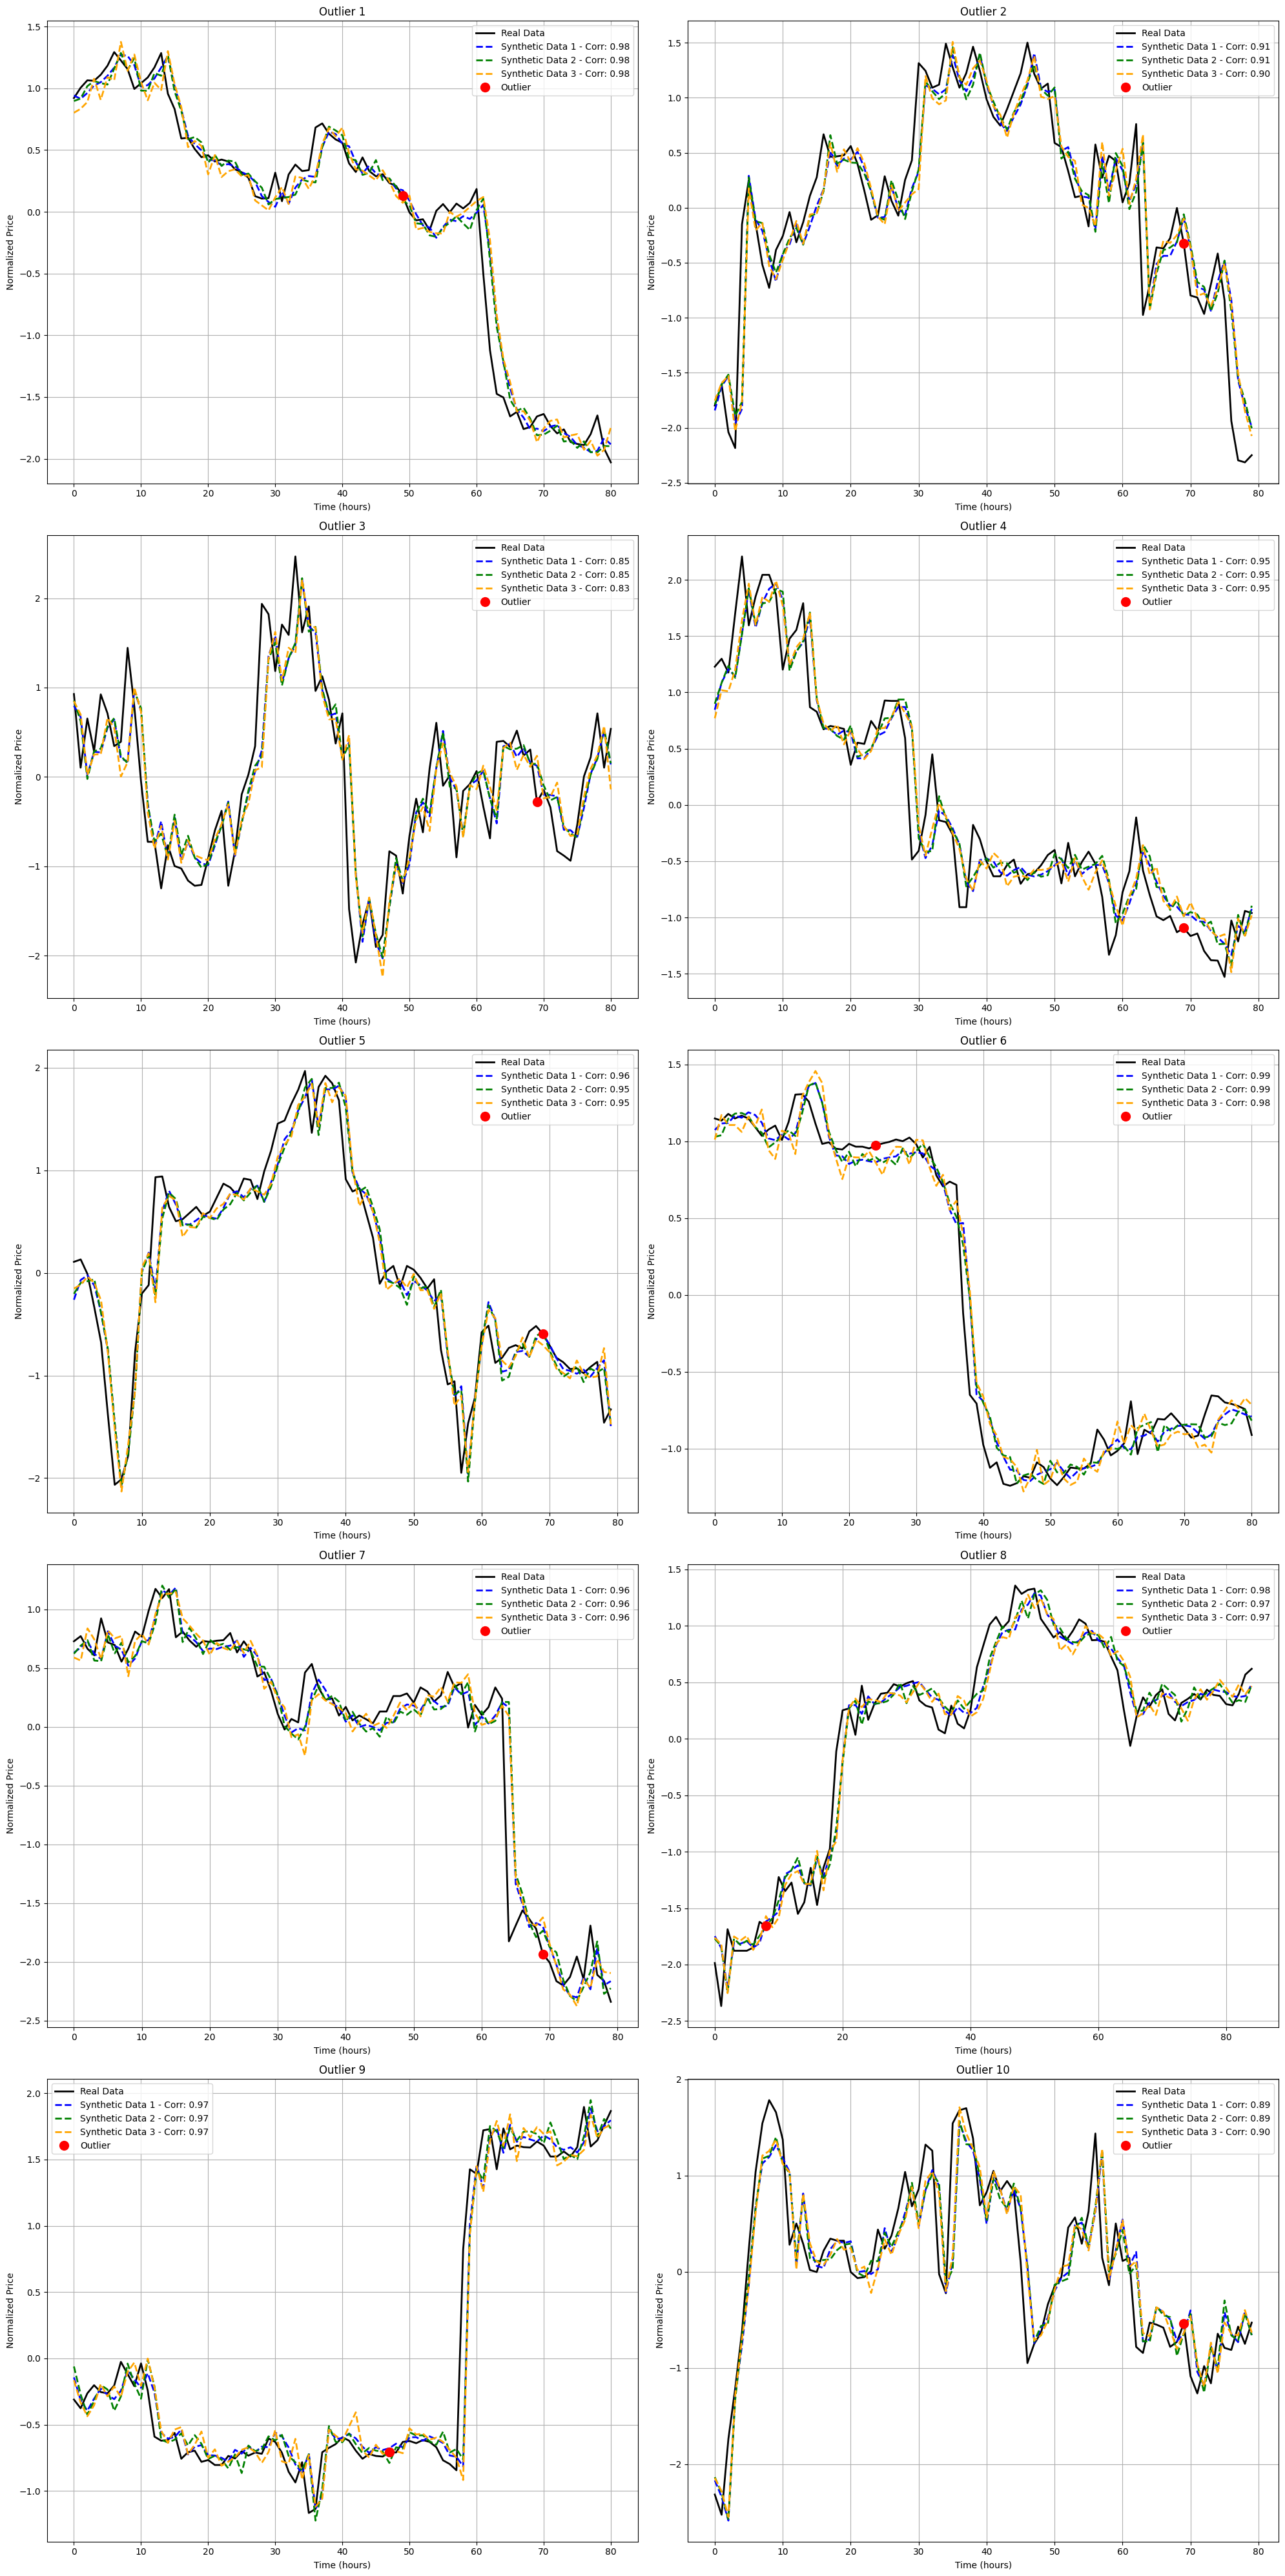

In [1]:
import pandas as pd
import requests
from datetime import timedelta
from sklearn.preprocessing import StandardScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

def fetch_hourly_data(symbol, start_date, end_date, api_key):
    url = f"https://api.polygon.io/v2/aggs/ticker/{symbol}/range/1/hour/{start_date}/{end_date}?apiKey={api_key}"
    response = requests.get(url)
    hourly_data = pd.DataFrame(response.json()['results'])
    hourly_data['date'] = pd.to_datetime(hourly_data['t'], unit='ms')
    hourly_data.drop(columns=['t'], inplace=True)   
    return hourly_data

# Load the dataset
data = pd.read_csv('Outlier Dataset.csv')
data['date'] = pd.to_datetime(data['date'])

# Filter rows where 'outlier' is 1
outliers = data[data['outlier'] == 1]

# Generate date ranges for each outlier
date_ranges = pd.DataFrame({
    "start_date": outliers['date'] - timedelta(days=3),
    "end_date": outliers['date'] + timedelta(days=3),
    "outlier_date": outliers['date']
})

api_key = 'beBybSi8daPgsTp5yx5cHtHpYcrjp5Jq'
symbol = 'C:USDEUR'

# Plotting setup
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(20, 40))
axs = axs.flatten()

# DataFrames to store results
df_real = pd.DataFrame()
df_synthetic_1 = pd.DataFrame()
df_synthetic_2 = pd.DataFrame()
df_synthetic_3 = pd.DataFrame()

# Process each date range
for idx, (ax, (_, row)) in enumerate(zip(axs, date_ranges.iterrows())):
    hourly_data = fetch_hourly_data(symbol, row['start_date'].date(), row['end_date'].date(), api_key)
    
    # Fill missing values
    hourly_data.fillna(method='ffill', inplace=True)  # forward fill

    # Normalize data
    scaler = StandardScaler()
    hourly_data[['v', 'vw', 'o', 'c', 'h', 'l']] = scaler.fit_transform(hourly_data[['v', 'vw', 'o', 'c', 'h', 'l']])

    # Prepare data for LSTM
    n_features = 1
    n_timesteps = 3  # Number of timesteps per sequence
    X = []
    y = []

    for i in range(n_timesteps, len(hourly_data)):
        X.append(hourly_data[['c']].iloc[i-n_timesteps:i].values)
        y.append(hourly_data['c'].iloc[i])

    X = np.array(X)
    y = np.array(y)

    # Build and fit LSTM model
    model = Sequential([
        LSTM(50, activation='relu', input_shape=(n_timesteps, n_features)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X, y, epochs=150, verbose=1)

    # Generate synthetic data with different noise types
    synthetic_data = []
    noises = [0.01, 0.05, 0.07]  # Different standard deviations for noise
    correlations = []
    for j, noise in enumerate(noises):
        predicted = model.predict(X)
        noise_data = np.random.normal(0, noise, predicted.shape)
        synthetic = predicted + noise_data
        synthetic_data.append(synthetic)
        
        # Calculate correlation
        correlation, _ = pearsonr(y, synthetic.flatten())
        correlations.append(correlation)

    # Store real and synthetic data
    df_real = pd.concat([df_real, pd.DataFrame(y, columns=[f'real_data_{idx+1}'])])
    df_synthetic_1 = pd.concat([df_synthetic_1, pd.DataFrame(synthetic_data[0], columns=[f'synthetic_1_{idx+1}'])])
    df_synthetic_2 = pd.concat([df_synthetic_2, pd.DataFrame(synthetic_data[1], columns=[f'synthetic_2_{idx+1}'])])
    df_synthetic_3 = pd.concat([df_synthetic_3, pd.DataFrame(synthetic_data[2], columns=[f'synthetic_3_{idx+1}'])])

    # Plotting
    real_data = hourly_data['c'].iloc[n_timesteps:].values
    ax.plot(real_data, label='Real Data', color='black', linewidth=2)
    colors = ['blue', 'green', 'orange']
    for k, data in enumerate(synthetic_data):
        ax.plot(data.flatten(), label=f'Synthetic Data {k+1} - Corr: {correlations[k]:.2f}', color=colors[k], linestyle='--', linewidth=2)
    outlier_index = hourly_data.index[hourly_data['date'] == row['outlier_date']]
    if not outlier_index.empty:
        ax.plot(outlier_index[0] - n_timesteps, real_data[outlier_index[0] - n_timesteps], 'ro', markersize=10, label='Outlier')
    ax.set_title(f'Outlier {idx + 1}')
    ax.set_xlabel('Time (hours)')
    ax.set_ylabel('Normalized Price')
    ax.legend()
    ax.grid(True)

# Display all the plots
plt.tight_layout()
plt.show()